In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Functions

In [3]:
len([1,2,3])

3

In [4]:
len.__doc__

'Return the number of items in a container.'

In [5]:
def square():
    '''This function returns the square of 2'''
    return 2**2

In [6]:
square()

4

In [7]:
square.__doc__

'This function returns the square of 2'

In [8]:
def square_with_argument(n):
    '''This function takes a number as its input and returns its square'''
    return n**2

In [9]:
square_with_argument(2)

4

In [10]:
square_with_argument(3)

9

In [11]:
n

NameError: name 'n' is not defined

In [12]:
def raise_to_power_with_multiple_arguments(n,i):
    '''This function takes two numbers as input and raise the first to the power of the second'''
    return n**i

In [13]:
raise_to_power_with_multiple_arguments(2,2)

4

In [14]:
raise_to_power_with_multiple_arguments(2,3)

8

In [15]:
def raise_to_power_with_default_arguments(n,i=2):
    '''This function takes two numbers as input and raise the first to the power of the second (by default 2)'''
    return n**i

In [16]:
raise_to_power_with_default_arguments(2)

4

In [17]:
raise_to_power_with_default_arguments(2,3)

8

#### apply custom functions to pandas dataframe

In [18]:
df = pd.DataFrame({'name':['Anna','Bob','Cecil'],
                  'income':[1000,300,600],
                  'num_children':[2,1,4]})
df

,income,name,num_children
0,1000,Anna,2
1,300,Bob,1
2,600,Cecil,4


In [19]:
def tax(row):
    if row['income'] < 500:
        tax_percent = 0.05
    elif row['income'] < 800:
        tax_percent = 0.1
    else:
        tax_percent = 0.2
        
    if row['num_children'] >= 3:
        tax_percent = tax_percent/2
        
    return row['income']*tax_percent

In [20]:
df['tax'] = df.apply(lambda x: tax(x), axis=1)

In [21]:
df

,income,name,num_children,tax
0,1000,Anna,2,200.0
1,300,Bob,1,15.0
2,600,Cecil,4,30.0


In [22]:
df = pd.concat([df]*100)

In [23]:
% timeit df['tax'] = df.apply(lambda x: tax(x), axis=1)

10.2 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
def iterrow_solution(df):
    new_col = []
    for index,row in df.iterrows():
        if row['income'] < 500:
            tax_percent = 0.05
        elif row['income'] < 800:
            tax_percent = 0.1
        else:
            tax_percent = 0.2

        if row['num_children'] >= 3:
            tax_percent = tax_percent/2
        new_col.append(row['income']*tax_percent)
    df['tax'] = new_col
    return df

In [25]:
% timeit iterrow_solution(df)

18 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### clustering

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

In [26]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [27]:
iris = datasets.load_iris()
data = iris.data

 <img src="iris_petal_sepal.png" />

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [30]:
estimator = KMeans(init='k-means++', n_clusters=3)

In [31]:
estimator

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
estimator.fit(scale(data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
estimator.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [34]:
from collections import Counter

In [35]:
Counter(estimator.labels_)

Counter({0: 50, 1: 47, 2: 53})

In [36]:
estimator.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [39]:
import seaborn as sns

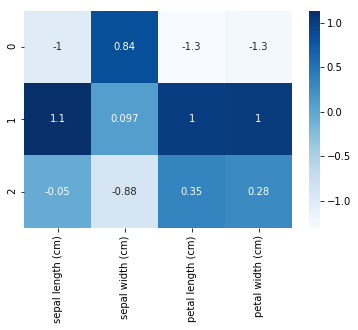

In [40]:
centers = pd.DataFrame(estimator.cluster_centers_)
centers.columns = iris.feature_names
sns.heatmap(centers, annot=True, cmap='Blues')

#### visualize clusters

In [43]:
import matplotlib

In [44]:
cmap = matplotlib.cm.get_cmap('winter')

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

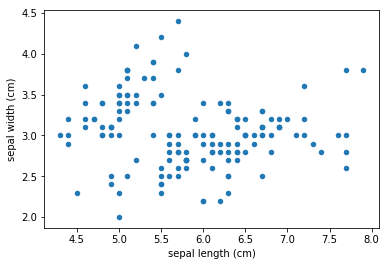

In [45]:
iris_df.plot.scatter(x=iris_df.columns[0], y=iris_df.columns[1])

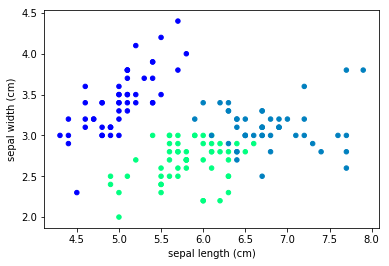

In [46]:
iris_df.plot.scatter(x=iris_df.columns[0], y=iris_df.columns[1], c=estimator.labels_, cmap=cmap, colorbar=False)


In [47]:
from itertools import combinations

In [48]:
xy_toplot = list(combinations(iris_df.columns,2))
xy_toplot

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

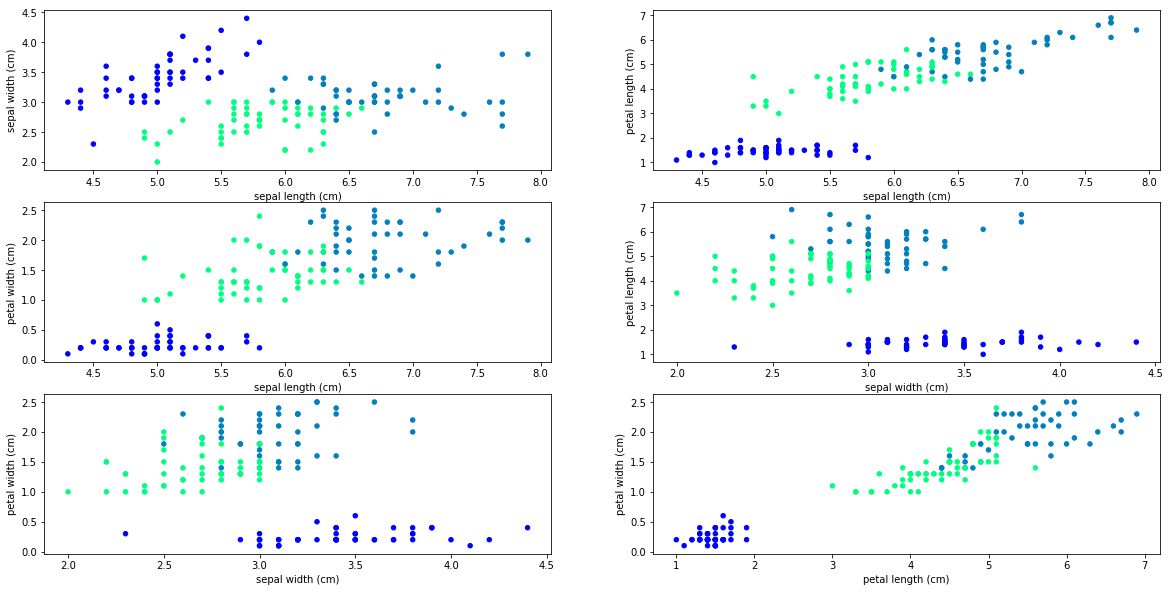

In [49]:
fig, axes = plt.subplots(nrows=len(xy_toplot)//2,ncols=2, figsize=(20,10))
i = 0
for x_ax, y_ax in xy_toplot:
    iris_df.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//2, i%2],colorbar=False)
    i += 1
plt.show()

#### choosing the k

In [50]:
dists = []
for cluster_num in range(2,7):
    estimator = KMeans(init='k-means++', n_clusters=cluster_num)
    estimator.fit(data)
    dists.append(estimator.inertia_)

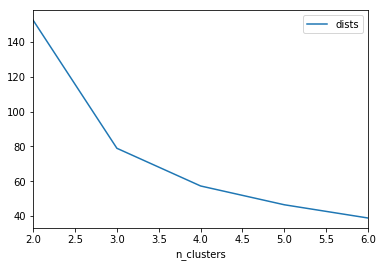

In [51]:
pd.DataFrame({'dists':dists, 'n_clusters':list(range(2,7))}).plot(x='n_clusters',y='dists')

#### initializing the cluster centers

In [52]:
estimator = KMeans(init='k-means++', n_clusters=3)
estimator_rand = KMeans(init='random', n_clusters=3)

In [53]:
estimator.fit(data)
estimator_rand.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
pca = PCA(n_components=3).fit(data)
estimator_pca = KMeans(init=pca.components_, n_clusters=3)
estimator_pca.fit(data)

/home/esztersomos/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 0.36159, -0.08227,  0.85657,  0.35884],
       [ 0.65654,  0.72971, -0.17577, -0.07471],
       [-0.581  ,  0.59642,  0.07252,  0.54906]]),
    max_iter=300, n_clusters=3, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

#### finding the best parameters

In [55]:
def fit_kmeans(data, num_clusters, init_method):
    if init_method == 'pca':
        pca = PCA(n_components=num_clusters).fit(data)
        estimator = KMeans(init=pca.components_, n_clusters=num_clusters)
    else:
        estimator = KMeans(init=init_method, n_clusters=num_clusters)
    
    estimator.fit(data)
    return estimator

In [56]:
def print_metrics(data, estimator):
    print('Cluster sizes: ', Counter(estimator.labels_).values())

In [57]:
def draw_cluster_plot(iris_df, estimator, figsize=(20,10), cmap_name='winter'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(iris_df.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//2,ncols=2, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        iris_df.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//2, i%2],colorbar=False)
        i += 1
    plt.show()

In [58]:
dists_dict = {}

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
data = scale(iris_df)

for init_method in ['k-means++','random','pca']:
    print(init_method)
    dists_dict[init_method] = []
    for i in range(2,5):      
        estimator = fit_kmeans(data, i, init_method)
        print_metrics(iris_df,estimator)
        dists_dict[init_method].append(estimator.inertia_)

k-means++
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([50, 47, 53])
Cluster sizes:  dict_values([24, 26, 47, 53])
random
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([50, 47, 53])
Cluster sizes:  dict_values([27, 23, 47, 53])
pca
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([32, 22, 96])
Cluster sizes:  dict_values([25, 25, 51, 49])


/home/esztersomos/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


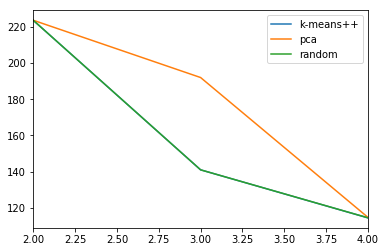

In [59]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,5))).plot()

In [60]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,5)))

,k-means++,pca,random
2,223.732006,223.732006,223.732006
3,140.965817,192.037174,140.965817
4,114.362815,114.643548,114.427145


k-means++


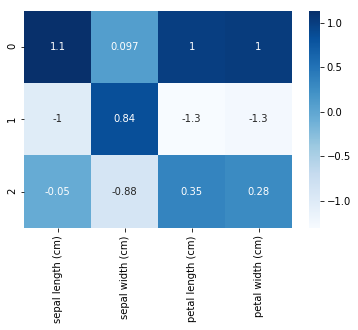

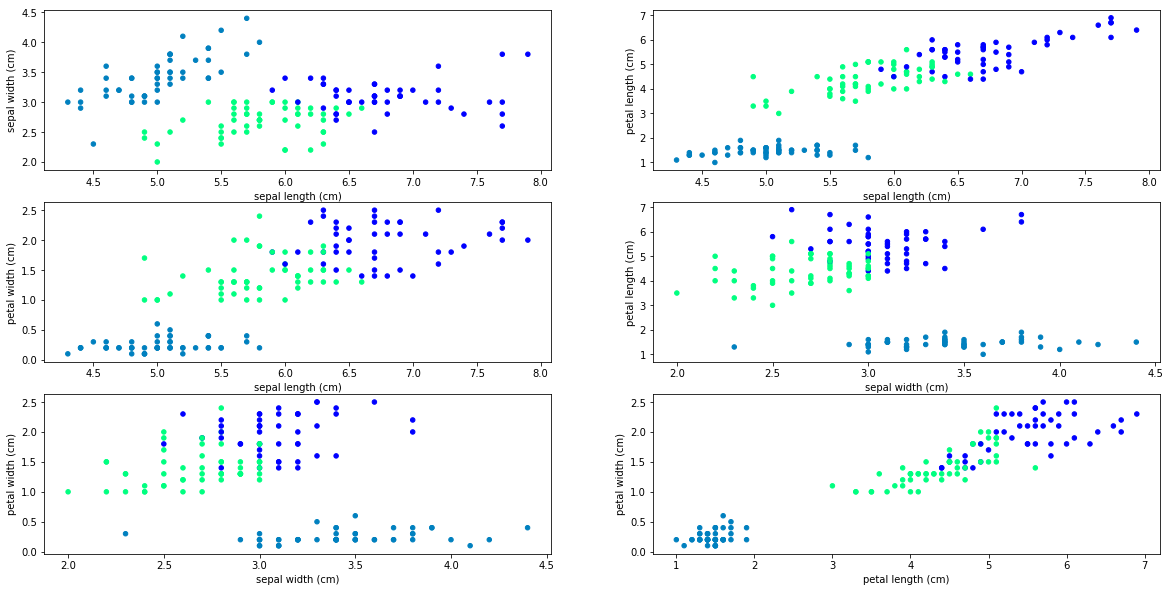

random


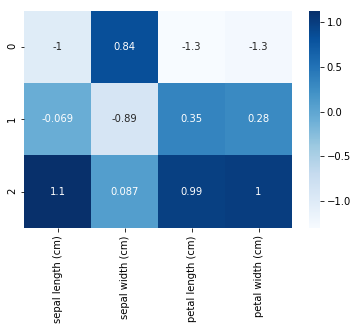

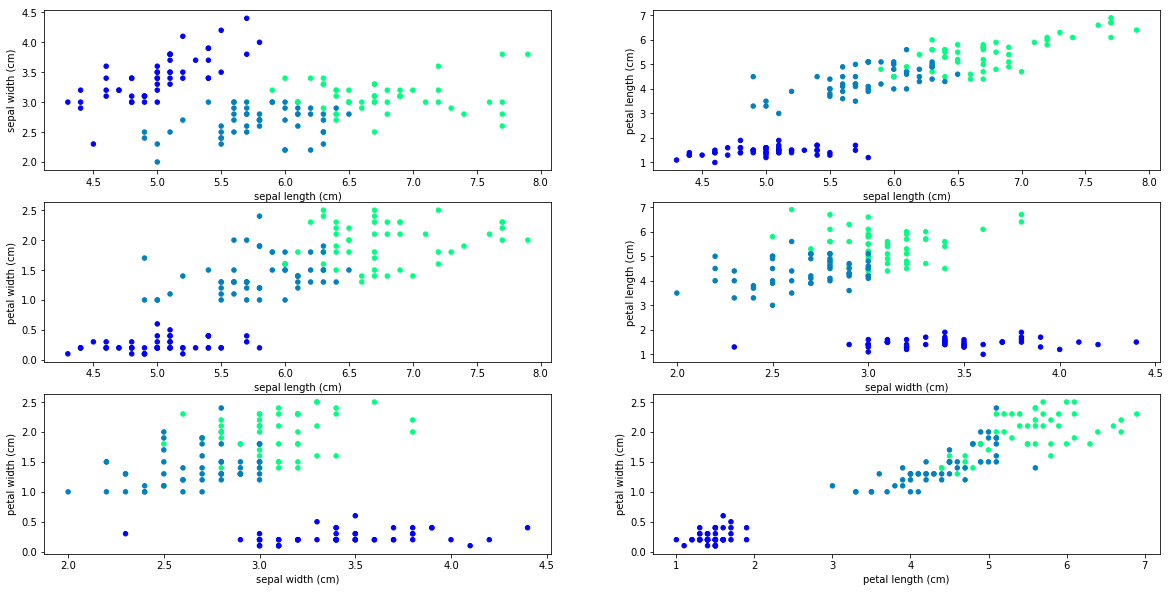

pca


/home/esztersomos/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


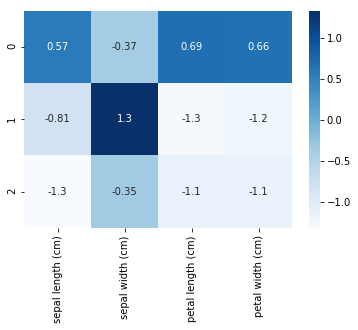

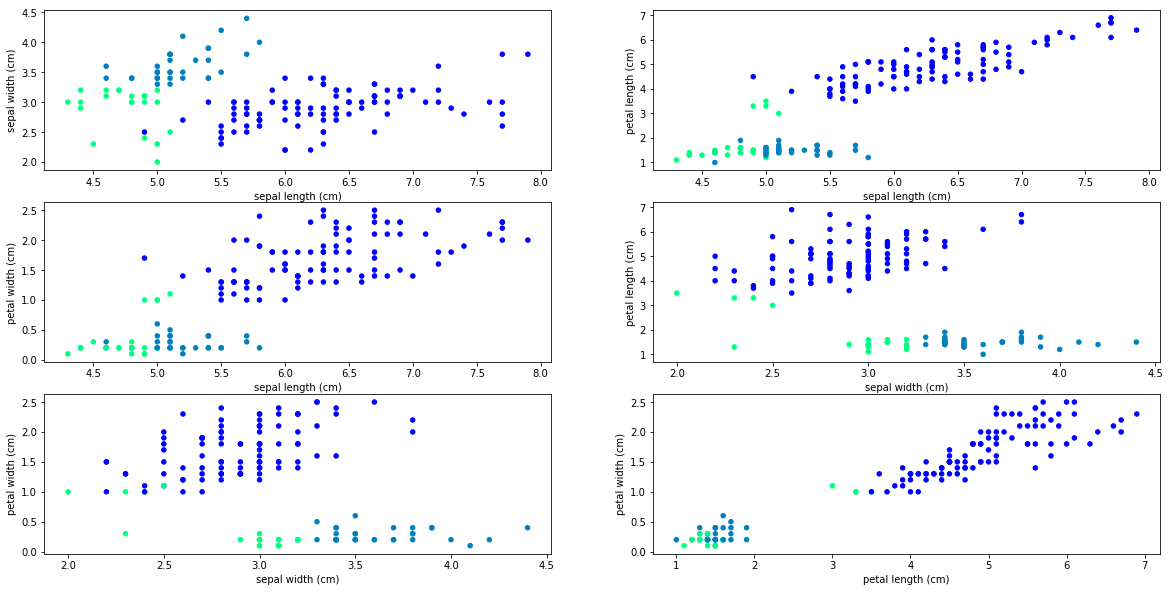

In [61]:
for init_method in ['k-means++','random','pca']:
    print(init_method)
    estimator = fit_kmeans(data, 3, init_method)
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = iris.feature_names
    sns.heatmap(centers, annot=True, cmap='Blues')
    plt.show()
    draw_cluster_plot(iris_df, estimator)

### 1 - exercise

- Read the trip and station csv-s into pandas dataframes. <br>
- Calculate the duration of each trip in minutes. For this you'll have to transform the end_date and start_date columns into datetime format and substract the latter from the former. To get the time difference in minutes convert the result to timedelta64[m] format. <br>
- Draw a histogram of the durations to see if there are any extreme values

In [93]:
trip = pd.read_csv('/home/esztersomos/Documents/CEU/winter_2019/Q3/trip.csv')
station = pd.read_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/station.csv')

In [94]:
trip['duration'] = (pd.to_datetime(trip['end_date']) - pd.to_datetime(trip['start_date'])).astype('timedelta64[m]')

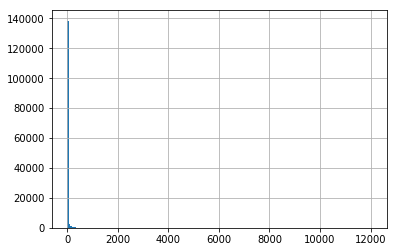

In [95]:
trip['duration'].hist(bins=200)

### 1 - check yourslef

In [97]:
if trip['duration'].sum() == 2953335:
    print('The duration column is correct')
else:
    print('The duration column is NOT correct')

The duration column is correct


### 2 - exercise
it looks like that people take the bycicles for unreasonably long times. Let's change the duration value to np.nan where it's higher than 300 minutes.

In [98]:
trip['duration'] = np.where(trip['duration'] > 300, np.nan, trip['duration'])

### 2 - check yourself

In [100]:
if trip['duration'].sum() == 2069201:
    print('The duration column is correct')
else:
    print('The duration column is NOT correct')

The duration column is correct


### 3 - exercise

By merging the trip and station dataframes, create a new dataframe called dist_df where for each trip the latitude and the longitude is given for both start and end stations. These columns should be called lat1, lon1 for the start station and lat2, lon2 for the end station <br>
Hint: You'll have to do multiple merges, and rename some columns

In [101]:
dist_df = pd.merge(trip[['Start Station','End Station','duration']], station[['name','lat','long']], how='left', left_on='Start Station',
                  right_on='name').drop('name',axis=1)
dist_df.columns = ['Start Station','End Station','duration','lat1','lon1']
dist_df = pd.merge(dist_df, station[['name','lat','long']], how='left', left_on='End Station',
                  right_on='name').drop('name',axis=1)
dist_df.columns = ['Start Station','End Station','duration','lat1','lon1','lat2','lon2']

In [109]:
if int(dist_df['lat1'].sum()) == 5434836 and int(dist_df['lat2'].sum())==5434810:
    print('The new columns are correct')
else:
    print('The new columns are NOT correct')

The new columns are correct


### 4 - exercise
There is a code snippet below that calculates the distance between two places given their coordinates (a_latitude, a_longitude, b_latitude, b_longitude). Write a function that takes a row from the trip dataframe as input and returns the calculated distance between ths start and the end stations as output. <br>
Using the apply method, call this function on the dist_df dataframe and calculate a new column called dist.

In [ ]:
from math import sin, cos, sqrt, atan2, radians

R = 6373.0

lat1 = radians(a_latitude)
lon1 = radians(a_longitude)
lat2 = radians(b_latitude)
lon2 = radians(b_longitude)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

In [111]:
from math import sin, cos, sqrt, atan2, radians
def dist_calc(row):
    R = 6373.0

    lat1 = radians(row.lat1)
    lon1 = radians(row.lon1)
    lat2 = radians(row.lat2)
    lon2 = radians(row.lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [112]:
dist_df['dist'] = dist_df.apply(lambda x: dist_calc(x), axis=1)

### 4 - check yourself

In [117]:
if int(dist_df['dist'].max()) == 68:
    print('The new column is correct')
else:
    print('The new column is NOT correct')

The new column is correct


### 5 - exercise
Create a new column in the dist_df called speed. Calculate the values by dividing the distance by the duration. <br>
Draw a histogram of the speed column to see if there are extreme values

In [120]:
dist_df['speed'] = dist_df['dist']/dist_df['duration']

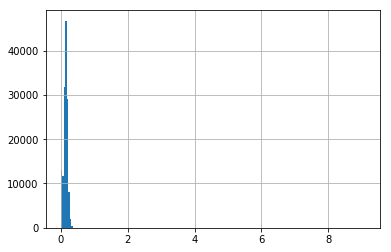

In [121]:
dist_df.speed.hist(bins=200)

### 5 - check yourslef

In [124]:
if int(dist_df['speed'].max()) == 9:
    print('The new column is correct')
else:
    print('The new column is NOT correct')

The new column is correct


### 6 - exercise
It looks like that there was a very fast trip. Let's assume that it's a data error and filter the row where the speed is above 1. <br>
Also replace the 0 values in the speed column by np.nan-s

In [125]:
dist_df = dist_df[dist_df.speed<1]

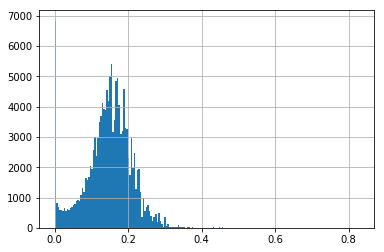

In [126]:
dist_df.speed.hist(bins=200)

In [127]:
dist_df['speed'] = dist_df['speed'].replace(0,np.nan)

/home/esztersomos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


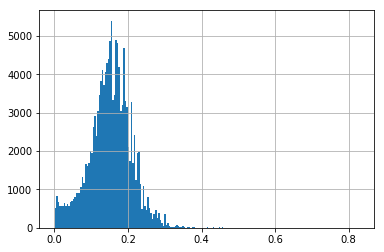

In [128]:
dist_df.speed.hist(bins=200)

### 6 - check yourslef

In [131]:
if dist_df['speed'].max() < 1 and dist_df['speed'].min() > 0:
    print('The speed column is correct')
else:
    print('The speed column is NOT correct')

The speed column is correct


### 7 - exercise
- Create a new column in the trip dataframe called circle. The value should be circle if the start and the end station is the same and no_circle otherwise. 
- Create a new dataframe called circle ration where there is a row for each station and a column for the circle/not_circle ratio of all trips starting at that station. You'll have to group the trip dataframe and pivot the grouped dataframe.
- Similarly, create a dataframe called subs_ratio where the trips made by customers/ trips made by subscribers ratio can be found for all stations
- As an advanced task create a function that takes the trip dataframe, the name of the column to group by and the name of the column to calculate the ratio from and returns the transformed dataframe 

In [75]:
def calc_ratio(df,group_col,ratio_col):
    ratio_df = df.groupby([group_col, ratio_col]).size().reset_index()
    
    pivot_df = ratio_df.pivot(index=group_col, columns=ratio_col, values=0)
    pivot_df.fillna(0, inplace=True)
    colnames = pivot_df.columns

    pivot_df[colnames[0] + '_per_' + colnames[1]] = pivot_df[colnames[0]]/pivot_df[colnames[1]]
    return pivot_df[[colnames[0] + '_per_' + colnames[1]]].reset_index()

In [76]:
trip['circle'] = np.where(trip['Start Station'] == trip['End Station'],'circle','not_circle')

In [77]:
circle_ratio = calc_ratio(trip, 'Start Station', 'circle')

In [78]:
subs_ratio = calc_ratio(trip, 'Start Station', 'Subscription Type')

### 7 - check yourself

In [135]:
if len(subs_ratio) == len(circle_ratio) == 69:
    print('The dataframes are correct')
else:
    print('The dataframes are NOT correct')

The dataframes are correct


### 8 - exercise
- Create a new dataframe where the average trip duration and speed is given for each start station. You can get this dataframe from the dist_df you've created above
- Create another one where the number of trips is given for each start station
- Merge these two dataframes with the station dataframe and also merge the circle_ratio and subs_ratio datagrames to it. At the end you should have one dataframe called features_df where there is a row for all the stations and columns for the:
    - dockcount
    - average duration
    - average speed
    - number of trips
    - ratio of customers/subscribers
    - ratio of circle trips/not circle trips <br>
- Call these columns to ['Start Station','dockcount', 'duration', 'speed', 'trip_num','circle_per_not_circle', 'Customer_per_Subscriber'] and drop the other columns

In [79]:
dist_df_bystation = dist_df.groupby('Start Station').agg({
    'duration':'mean',
    'speed':'mean',
}).reset_index()

In [80]:
num_trips = trip.groupby('Start Station').size().reset_index()
num_trips.columns = ['Start Station','trip_num']

In [81]:
features_df = pd.merge(station[['name','dockcount']], dist_df_bystation, how='left',
                      left_on = 'name', right_on = 'Start Station').drop('name',axis=1)

features_df = pd.merge(features_df, num_trips, how='left')

features_df = pd.merge(features_df, circle_ratio, how='left')
features_df = pd.merge(features_df, subs_ratio, how='left')

### 8 - check yourself

In [147]:
if dict(features_df.max()) == {'Customer_per_Subscriber': 3.0943396226415096,
 'Start Station': 'Yerba Buena Center of the Arts (3rd @ Howard)',
 'circle_per_not_circle': 1.6303030303030304,
 'dockcount': 27,
 'duration': 57.85167464114833,
 'speed': 0.23527836032786675,
 'trip_num': 9836}:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 9 - exercise

Use K-means clustering on the feature_df (without hte Start Station column) to find clusters among the stations. Experiment with the init_method and the number of clusters. You can also exclude columns. <br>
When you find a method that gives meaningful clusters, visualize it and write one sentence about each cluster that describes what makes it different from the other ones. <br><br>
As an advanced task write functions that you can call with different parameters

In [82]:
data = scale(features_df.drop('Start Station', axis=1))

In [83]:
dists_dict = {}

for init_method in ['k-means++','random','pca']:
    print(init_method)
    dists_dict[init_method] = []
    for i in range(2,7):      
        estimator = fit_kmeans(data, i, init_method)
        print_metrics(data,estimator)
        dists_dict[init_method].append(estimator.inertia_)

k-means++
Cluster sizes:  dict_values([68, 1])
Cluster sizes:  dict_values([29, 39, 1])
Cluster sizes:  dict_values([24, 12, 32, 1])
Cluster sizes:  dict_values([24, 8, 31, 5, 1])
Cluster sizes:  dict_values([12, 8, 23, 5, 1, 20])
random
Cluster sizes:  dict_values([58, 11])
Cluster sizes:  dict_values([53, 15, 1])
Cluster sizes:  dict_values([25, 8, 31, 5])
Cluster sizes:  dict_values([28, 13, 22, 5, 1])
Cluster sizes:  dict_values([11, 11, 19, 6, 1, 21])
pca
Cluster sizes:  dict_values([31, 38])
Cluster sizes:  dict_values([30, 8, 31])
Cluster sizes:  dict_values([14, 8, 24, 23])
Cluster sizes:  dict_values([13, 7, 7, 22, 20])
Cluster sizes:  dict_values([14, 12, 20, 4, 1, 18])


/home/esztersomos/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


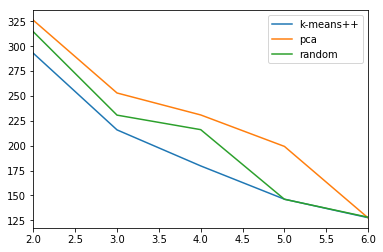

In [84]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,7))).plot()

In [85]:
def draw_cluster_plot(iris_df, estimator, figsize=(20,10), cmap_name='winter'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(iris_df.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//2 + 1,ncols=2, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        iris_df.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//2, i%2],colorbar=False)
        i += 1
    plt.show()
    

k-means++
Counter({0: 32, 3: 28, 2: 8, 1: 1})


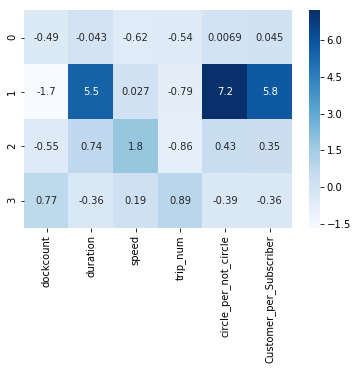

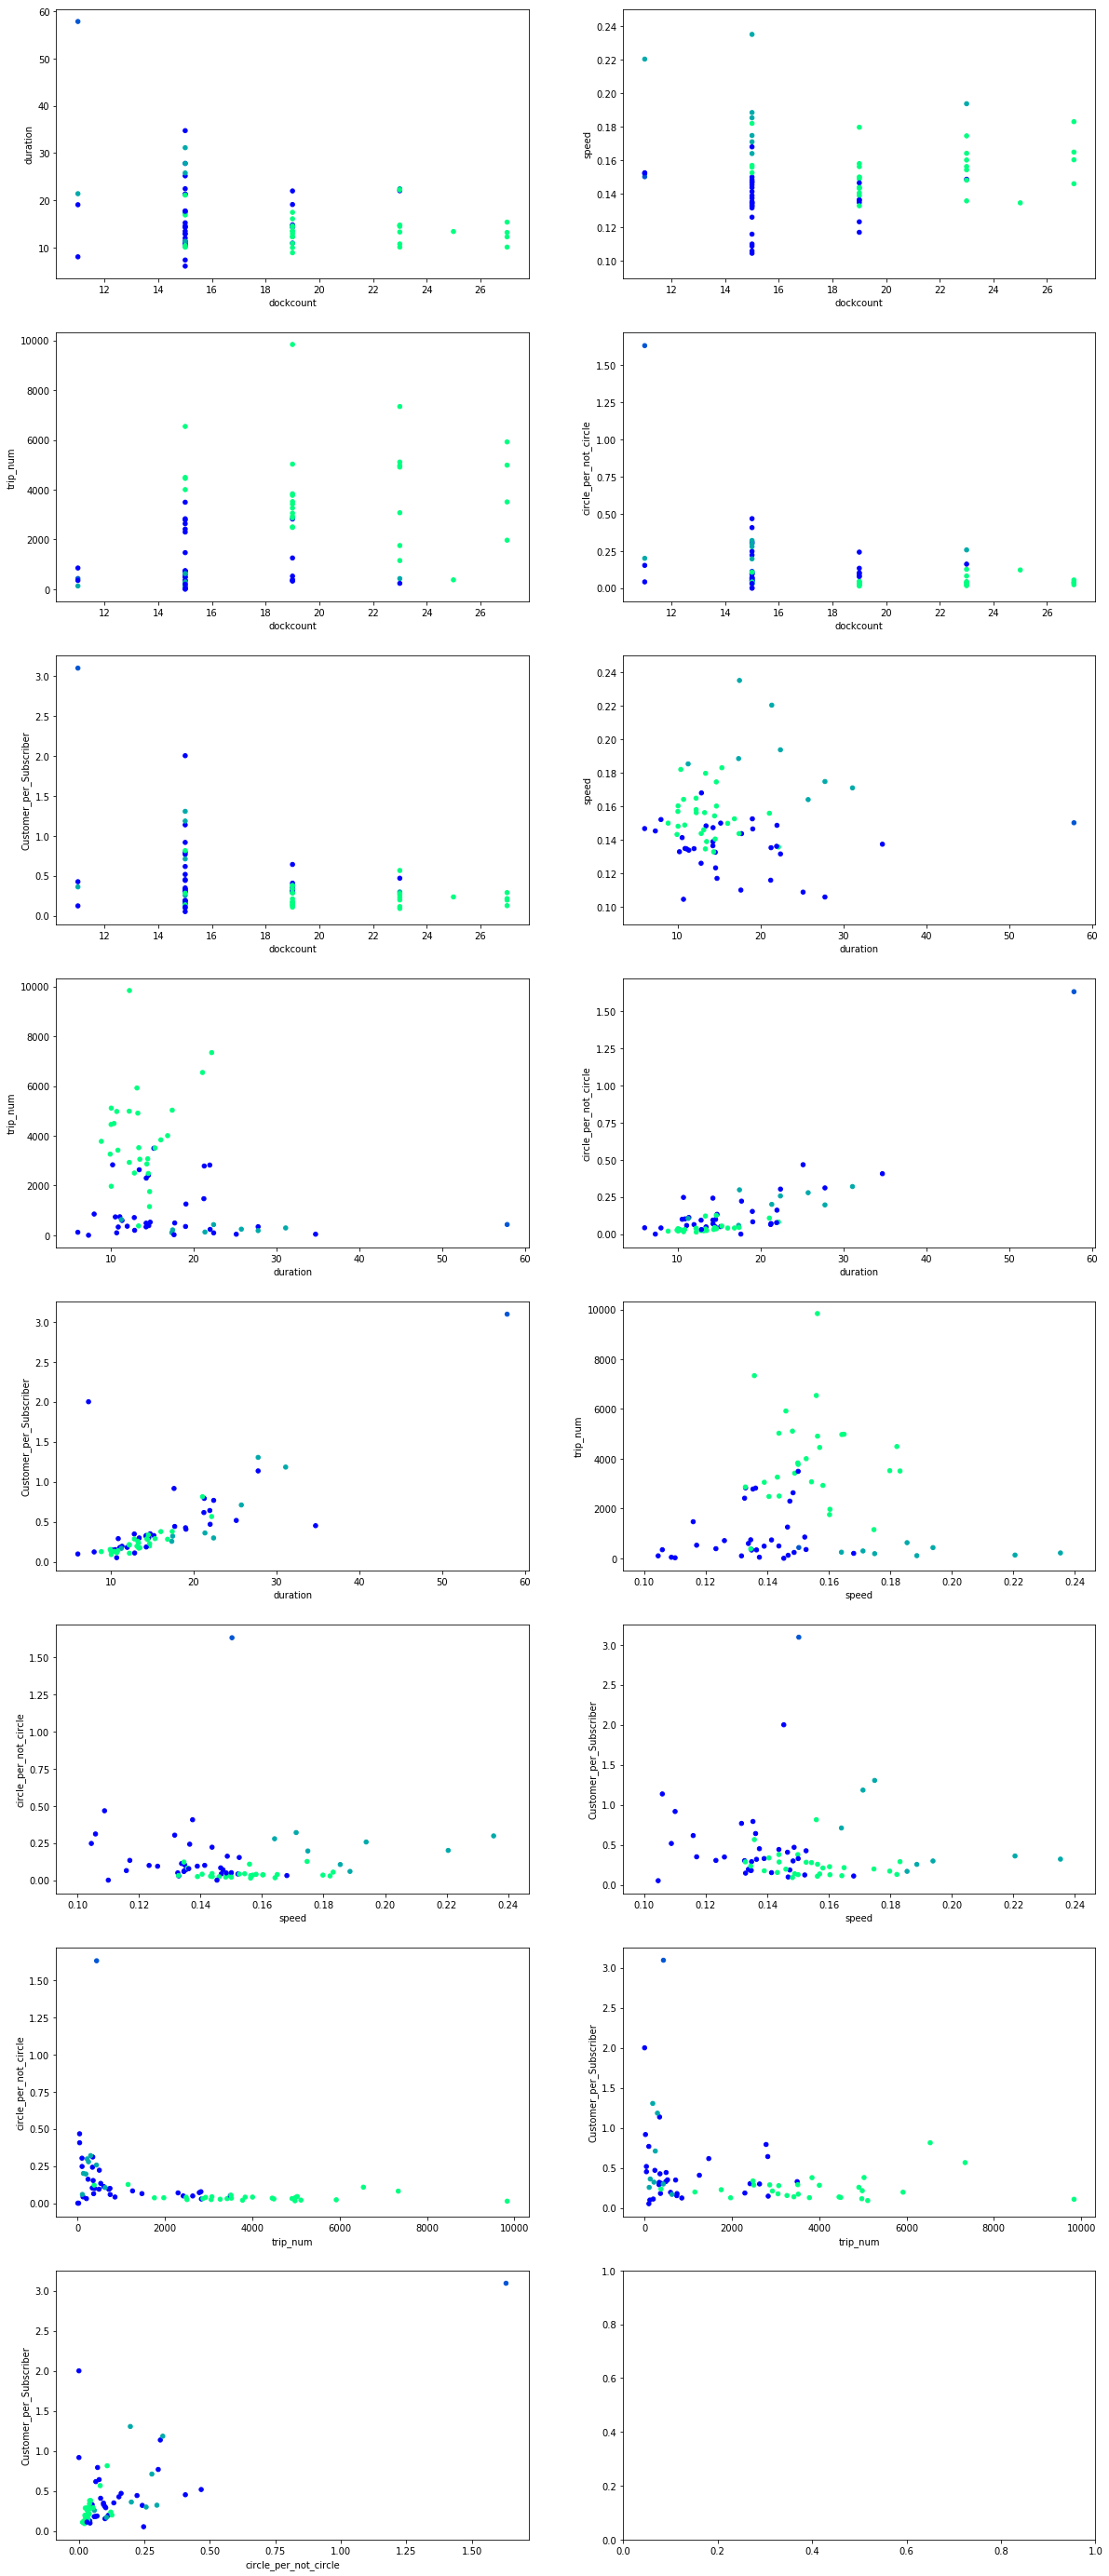

In [86]:
for init_method in ['k-means++','random','pca']:
    print(init_method)
    estimator = fit_kmeans(data, 4, init_method)
    print(Counter(estimator.labels_))
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = features_df.drop('Start Station', axis=1).columns
    sns.heatmap(centers, annot=True, cmap='Blues')
    plt.show()
    
    draw_cluster_plot(features_df.drop('Start Station', axis=1), estimator, figsize=(20,50), cmap_name='winter')
    break

In [87]:
def draw_cluster_plot2(iris_df, estimator, figsize=(20,10), cmap_name='winter'):
    
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(iris_df.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//2 + 1,ncols=2, figsize=figsize)
    i = 0
    
    iris_df['cluster'] = estimator.labels_
    iris_df = iris_df[iris_df.duration<50]
    for x_ax, y_ax in xy_toplot:
        iris_df.plot.scatter(x=x_ax, y=y_ax, c=iris_df.cluster, cmap=cmap, ax=axes[i//2, i%2],colorbar=False)
        i += 1
    plt.show()

k-means++
Counter({3: 30, 1: 29, 0: 9, 2: 1})


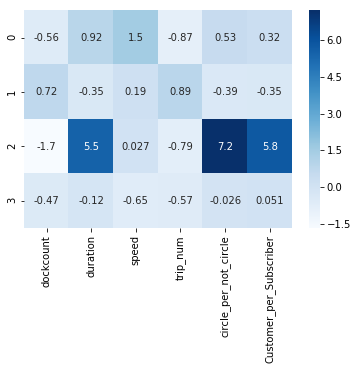

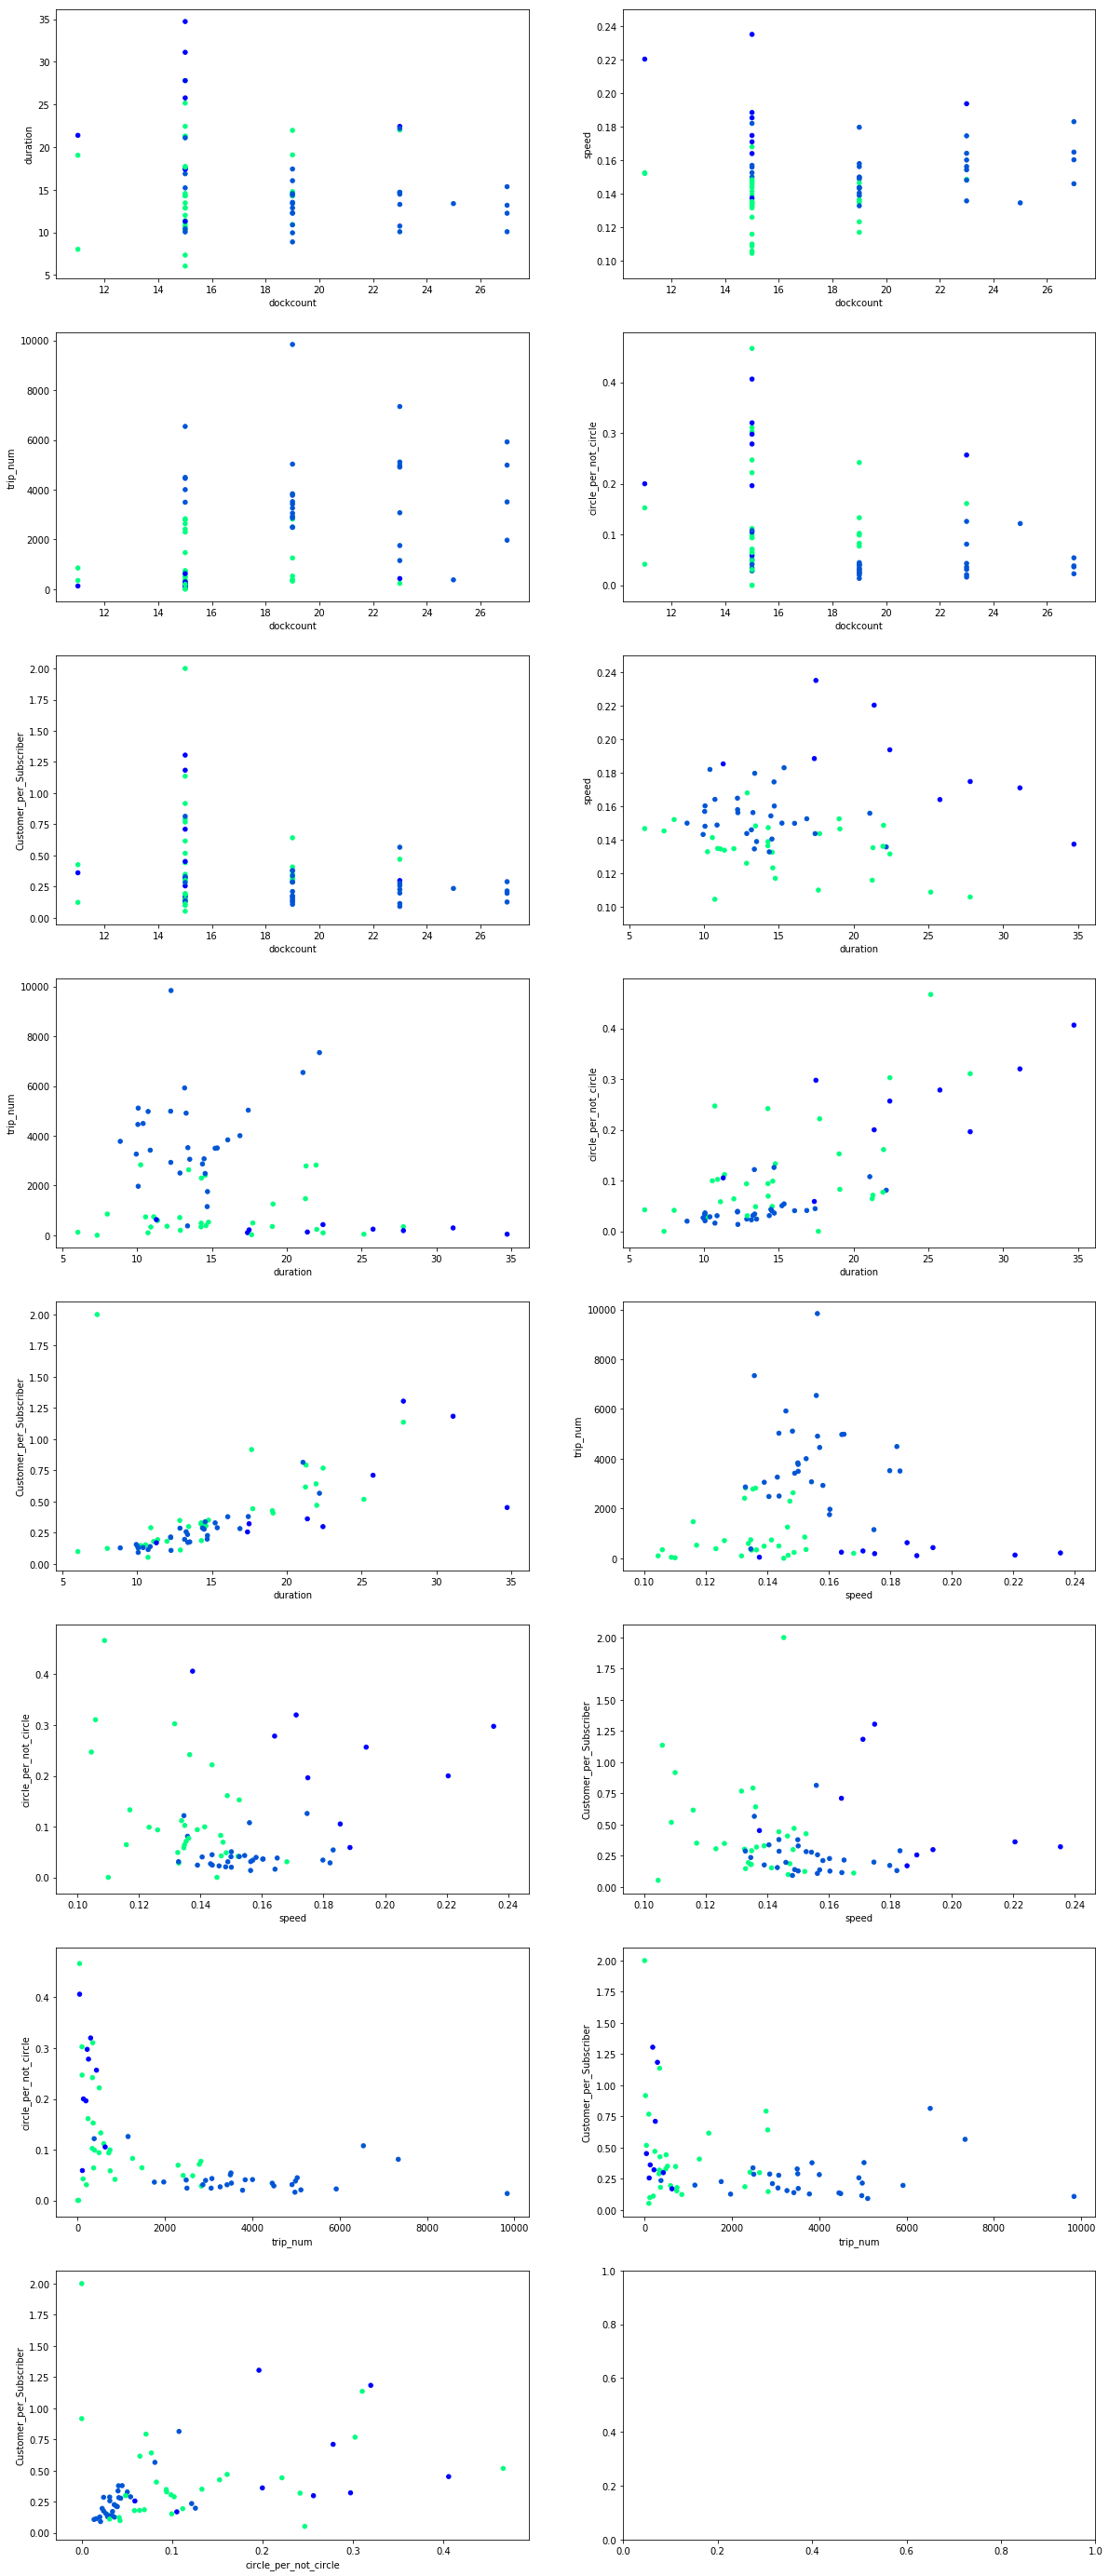

In [88]:
for init_method in ['k-means++','random','pca']:
    print(init_method)
    estimator = fit_kmeans(data, 4, init_method)
    print(Counter(estimator.labels_))
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = features_df.drop('Start Station', axis=1).columns
    sns.heatmap(centers, annot=True, cmap='Blues')
    plt.show()
    draw_cluster_plot2(features_df.drop('Start Station', axis=1),
                  estimator, figsize=(20,50), cmap_name='winter')
    break

In [89]:
centers = pd.DataFrame(estimator.cluster_centers_)
centers.columns = features_df.drop('Start Station', axis=1).columns
centers

,dockcount,duration,speed,trip_num,circle_per_not_circle,Customer_per_Subscriber
0,-0.563157,0.924112,1.539816,-0.871090,0.532602,0.322814
1,0.723094,-0.349396,0.188533,0.887193,-0.387135,-0.353815
2,-1.674969,5.481163,0.026852,-0.786109,7.211257,5.812099
3,-0.474212,-0.122190,-0.645088,-0.570089,-0.025925,0.051440


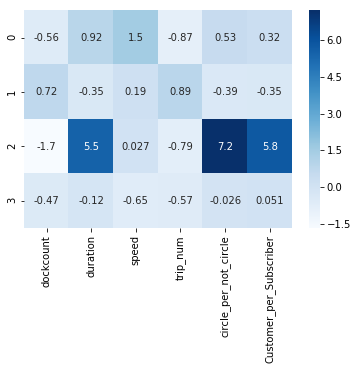

In [90]:
import seaborn as sns

sns.heatmap(centers, annot=True, cmap='Blues')

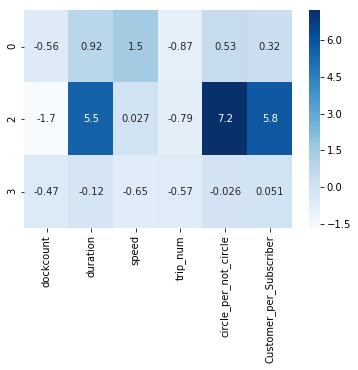

In [91]:
sns.heatmap(centers.drop(1), annot=True, cmap='Blues')